# Import modules

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from keras.layers import BatchNormalization

# Tuning parameters

In [ ]:
epochs = 50
learning_rate=0.001

In [ ]:
batch_size = 128
num_classes = 10

# Data

## Plot image

In [ ]:
def plot_images(x, y_true, y_pred=None, size=(5, 5)):
    assert len(x) == len(y_true) == size[0] * size[1]
    
    fig, axes = plt.subplots(size[0], size[1])
    fig.subplots_adjust(hspace=0.5, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        if x[i].shape[-1] == 1:
          ax.imshow(x[i].reshape(x[i].shape[0], x[i].shape[1]))
        else:
          ax.imshow(x[i])

        if y_pred is None:
            xlabel = "True: {0}".format(y_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(y_true[i].argmax(), 
                                                   y_pred[i].argmax())

        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

## Load dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Reshaping the data

In [ ]:
if len(x_train.shape) < 4:
  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Applying One hot encoding for the data

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Show data

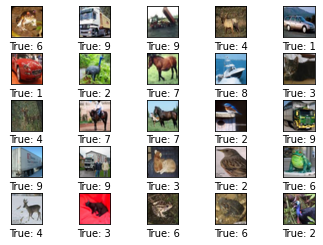

In [ ]:
plot_images(x_train[:25], y_train[:25])

# Creating the DNN model

In [ ]:
model = Sequential()

## Adding layers to the model

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),padding='same', activation = 'relu',
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Visualization the model

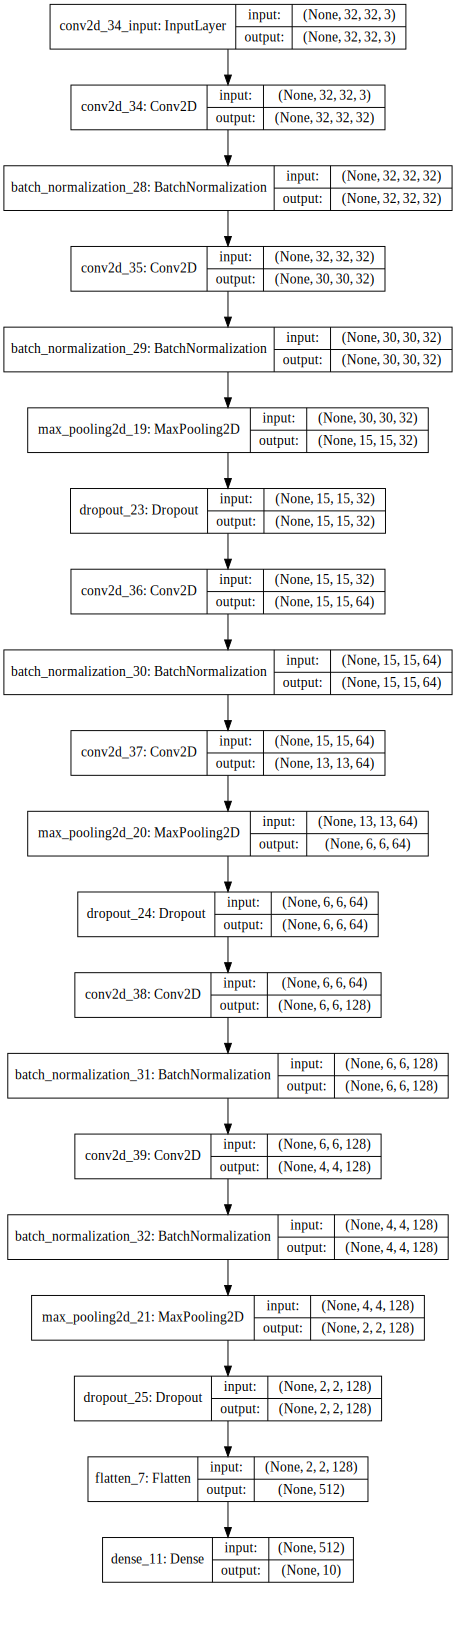

In [ ]:
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

## Optimizer

In [ ]:
optimizer = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

## Compiling the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizer, 
              metrics=['accuracy'])

## Training the model

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 517us/step - loss: 1.7765 - accuracy: 0.4360 - val_loss: 2.5456 - val_accuracy: 0.2585
Epoch 2/50
50000/50000 [==============================] - 24s 490us/step - loss: 1.1044 - accuracy: 0.6207 - val_loss: 0.9500 - val_accuracy: 0.6650
Epoch 3/50
50000/50000 [==============================] - 24s 489us/step - loss: 0.8836 - accuracy: 0.6923 - val_loss: 0.8292 - val_accuracy: 0.7084
Epoch 4/50
50000/50000 [==============================] - 25s 491us/step - loss: 0.7736 - accuracy: 0.7298 - val_loss: 0.7491 - val_accuracy: 0.7447
Epoch 5/50
50000/50000 [==============================] - 25s 493us/step - loss: 0.6931 - accuracy: 0.7577 - val_loss: 0.7270 - val_accuracy: 0.7496
Epoch 6/50
50000/50000 [==============================] - 25s 492us/step - loss: 0.6405 - accuracy: 0.7770 - val_loss: 0.7094 - val_accuracy: 0.7648
Epoch 7/50
50000/50000 [==============================] 

## Evaulating the model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4941357343196869
Test accuracy: 0.8500999808311462


## Prediction the model

In [ ]:
y_pred = model.predict(x_test)

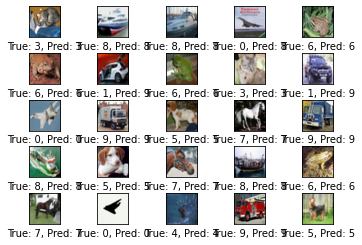

In [ ]:
plot_images(x=x_test[:25], y_true=y_test[:25], y_pred=y_pred[:25])

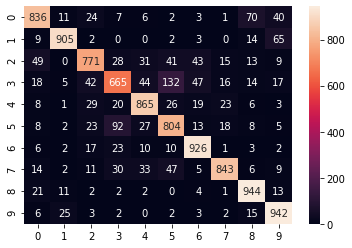

In [ ]:
y_result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(pd.DataFrame(y_result, range(10), range(10)), annot=True, fmt='g')